In [1]:
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 70.3 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [boto3]32m1/4 [botocore]


In [11]:
!pip install botocore
!pip install s3fs

In [9]:
!pip install PyAthena

  Using cached pyathena-3.22.0-py3-none-any.whl.metadata (6.3 kB)
Using cached pyathena-3.22.0-py3-none-any.whl (112 kB)


In [14]:
from pyathena import connect
import pandas as pd

In [23]:
ATHENA_DB = "bank-marketing-classification-db"
ATHENA_VIEW1 = "bank_marketing_data"
ATHENA_VIEW2 = "bank_marketing_additional_data"
S3_STAGING_DIR = "s3://bank-marketing-classification-b1/cleaned_dataset/"
AWS_REGION = "us-east-2"
WORKGROUP = "tableau-con-bmc"

conn = connect(work_group = WORKGROUP, s3_staging_dir=S3_STAGING_DIR, region_name=AWS_REGION, schema_name = ATHENA_DB)

In [24]:
sql_query1 = f"SELECT * FROM \"{ATHENA_DB}\".\"{ATHENA_VIEW1}\""
sql_query2 = f"SELECT * FROM \"{ATHENA_DB}\".\"{ATHENA_VIEW2}\""
bank = pd.read_sql_query(sql_query1, conn)
bank_additional = pd.read_sql(sql_query2, conn)

/var/folders/nv/0gm0y9v14g5442csxys2r93h0000gn/T/ipykernel_82016/2001156940.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bank = pd.read_sql_query(sql_query1, conn)
/var/folders/nv/0gm0y9v14g5442csxys2r93h0000gn/T/ipykernel_82016/2001156940.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bank_additional = pd.read_sql(sql_query2, conn)


In [25]:
bank.head()

,age,type_of_job,marital_status,education_level,credit_in_default,average_yearly_balance,housing_loan,personal_loan,contact_type,last_contact_day_of_week,last_contact_month,last_contact_duration_in_sec,number_of_contacts_during,last_contact_day,number_of_contacts_previous,outcome_of_the_previous_marketing,subscription_status
0,30,unemployed,married,1.0,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,2.0,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,3.0,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,3.0,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,2.0,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [26]:
bank_additional.head()

,age,type_of_job,marital_status,education_level,credit_in_default,housing_loan,personal_loan,contact_type,last_contact_day_of_week,last_contact_month,...,number_of_contacts_during,last_contact_day,number_of_contacts_previous,outcome_of_the_previous_marketing,subscription_status,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,30,blue-collar,married,4.0,no,yes,no,cellular,fri,may,...,2,999,0,nonexistent,no,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,5.0,no,no,no,telephone,fri,may,...,4,999,0,nonexistent,no,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,5.0,no,yes,no,telephone,wed,jun,...,1,999,0,nonexistent,no,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,4.0,no,unknown,unknown,telephone,fri,jun,...,3,999,0,nonexistent,no,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,6.0,no,yes,no,cellular,mon,nov,...,1,999,0,nonexistent,no,-0.1,93.200,-42.0,4.191,5195.8


In [27]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                49732 non-null  int64  
 1   type_of_job                        49732 non-null  object 
 2   marital_status                     49732 non-null  object 
 3   education_level                    47688 non-null  float64
 4   credit_in_default                  49732 non-null  object 
 5   average_yearly_balance             49732 non-null  int64  
 6   housing_loan                       49732 non-null  object 
 7   personal_loan                      49732 non-null  object 
 8   contact_type                       49732 non-null  object 
 9   last_contact_day_of_week           49732 non-null  object 
 10  last_contact_month                 49732 non-null  object 
 11  last_contact_duration_in_sec       49732 non-null  int

In [28]:
bank_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45307 entries, 0 to 45306
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                45307 non-null  int64  
 1   type_of_job                        45307 non-null  object 
 2   marital_status                     45307 non-null  object 
 3   education_level                    43409 non-null  float64
 4   credit_in_default                  45307 non-null  object 
 5   housing_loan                       45307 non-null  object 
 6   personal_loan                      45307 non-null  object 
 7   contact_type                       45307 non-null  object 
 8   last_contact_day_of_week           45307 non-null  object 
 9   last_contact_month                 45307 non-null  object 
 10  last_contact_duration_in_sec       45307 non-null  int64  
 11  number_of_contacts_during          45307 non-null  int

In [29]:
bank.isnull().sum()

age                                     0
type_of_job                             0
marital_status                          0
education_level                      2044
credit_in_default                       0
average_yearly_balance                  0
housing_loan                            0
personal_loan                           0
contact_type                            0
last_contact_day_of_week                0
last_contact_month                      0
last_contact_duration_in_sec            0
number_of_contacts_during               0
last_contact_day                        0
number_of_contacts_previous             0
outcome_of_the_previous_marketing       0
subscription_status                     0
dtype: int64

In [30]:
bank_additional.isnull().sum()

age                                     0
type_of_job                             0
marital_status                          0
education_level                      1898
credit_in_default                       0
housing_loan                            0
personal_loan                           0
contact_type                            0
last_contact_day_of_week                0
last_contact_month                      0
last_contact_duration_in_sec            0
number_of_contacts_during               0
last_contact_day                        0
number_of_contacts_previous             0
outcome_of_the_previous_marketing       0
subscription_status                     0
emp_var_rate                            0
cons_price_idx                          0
cons_conf_idx                           0
euribor3m                               0
nr_employed                             0
dtype: int64

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

Check the Null

In [176]:
bank_additional[bank_additional['education_level'].isnull()]

,age,type_of_job,marital_status,education_level,credit_in_default,housing_loan,personal_loan,contact_type,last_contact_day_of_week,last_contact_month,...,number_of_contacts_during,last_contact_day,number_of_contacts_previous,outcome_of_the_previous_marketing,subscription_status,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
28,47,admin.,single,NaN,unknown,no,no,telephone,thu,may,...,1,999,0,nonexistent,no,1.1,93.994,-36.4,4.860,5191.0
38,31,technician,single,NaN,no,yes,no,cellular,wed,may,...,1,999,1,failure,no,-1.8,92.893,-46.2,1.334,5099.1
39,20,student,single,NaN,no,no,no,cellular,mon,oct,...,3,999,3,failure,no,-1.1,94.601,-49.5,0.977,4963.6
62,52,admin.,married,NaN,no,yes,no,telephone,wed,apr,...,1,6,1,success,yes,-1.8,93.749,-34.6,0.654,5008.7
66,49,technician,divorced,NaN,no,yes,yes,cellular,thu,oct,...,1,999,0,nonexistent,no,-3.4,92.431,-26.9,0.754,5017.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45237,34,technician,married,NaN,no,yes,no,cellular,tue,nov,...,2,999,2,failure,no,-1.1,94.767,-50.8,1.046,4963.6
45239,60,admin.,married,NaN,no,no,no,cellular,tue,nov,...,2,999,0,nonexistent,no,-1.1,94.767,-50.8,1.046,4963.6
45241,34,technician,married,NaN,no,no,no,cellular,tue,nov,...,3,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.046,4963.6
45254,54,technician,married,NaN,no,yes,no,cellular,thu,nov,...,1,999,1,failure,no,-1.1,94.767,-50.8,1.041,4963.6


Subscription status vs financial indicators

<Axes: xlabel='subscription_status', ylabel='emp_var_rate'>

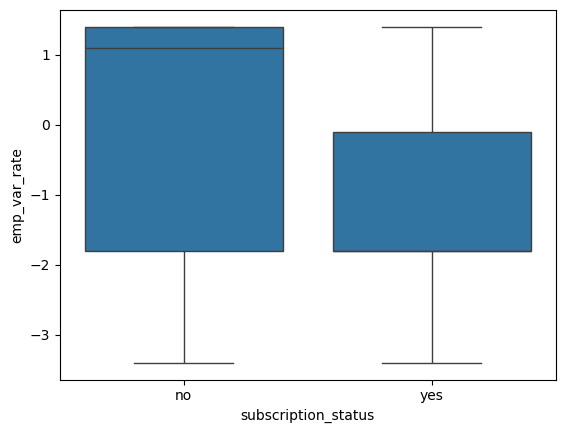

In [35]:
sns.boxplot(x="subscription_status", y="emp_var_rate", data=bank_additional)

{'whiskers': [<matplotlib.lines.Line2D at 0x30c14c950>,
 'caps': [<matplotlib.lines.Line2D at 0x30c14da60>,
 'boxes': [<matplotlib.lines.Line2D at 0x30c14c110>,
 'medians': [<matplotlib.lines.Line2D at 0x30c14f650>,
 'fliers': [<matplotlib.lines.Line2D at 0x30c14d220>,
 'means': []}

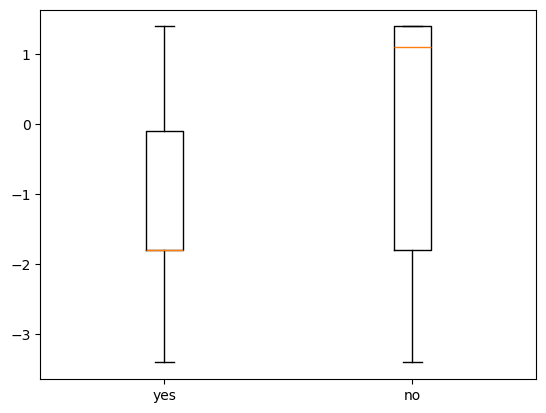

In [46]:
yes_data = bank_additional[bank_additional["subscription_status"] == 'yes']['emp_var_rate']
no_data = bank_additional[bank_additional["subscription_status"] == 'no']['emp_var_rate']
plt.boxplot([yes_data, no_data], tick_labels=["yes", "no"])

<Axes: xlabel='subscription_status', ylabel='cons_price_idx'>

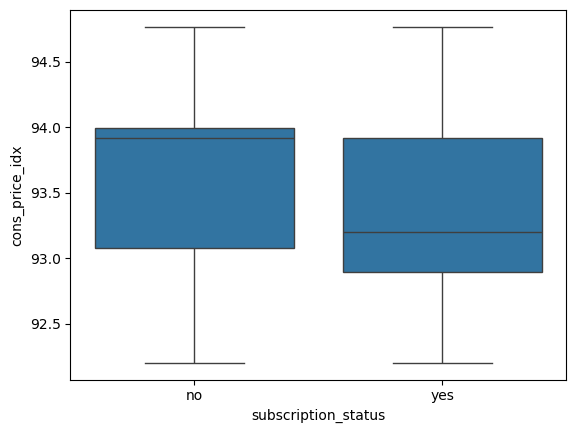

In [36]:
sns.boxplot(x="subscription_status", y="cons_price_idx", data=bank_additional)

<Axes: xlabel='subscription_status', ylabel='cons_conf_idx'>

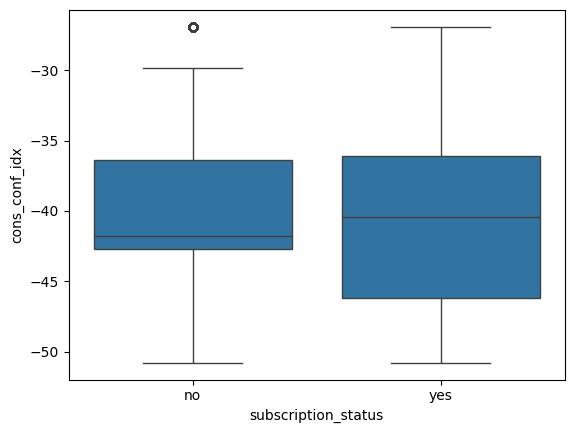

In [47]:
sns.boxplot(x="subscription_status", y="cons_conf_idx", data=bank_additional)

<Axes: xlabel='subscription_status', ylabel='nr_employed'>

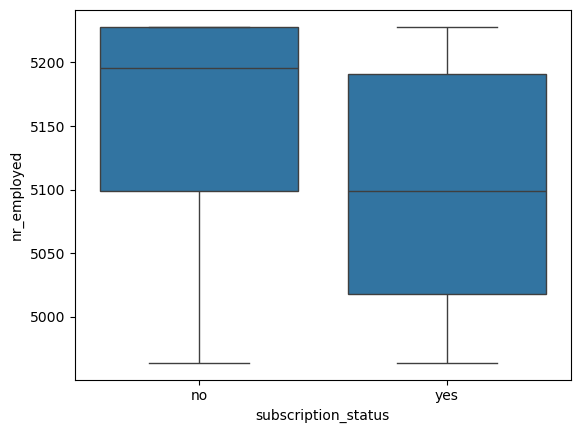

In [48]:
sns.boxplot(x="subscription_status", y="nr_employed", data=bank_additional)

Customers that say yes or no and their likelihood (naive probability) of having a certain type of job

<Axes: xlabel='type_of_job', ylabel='subscription_status'>

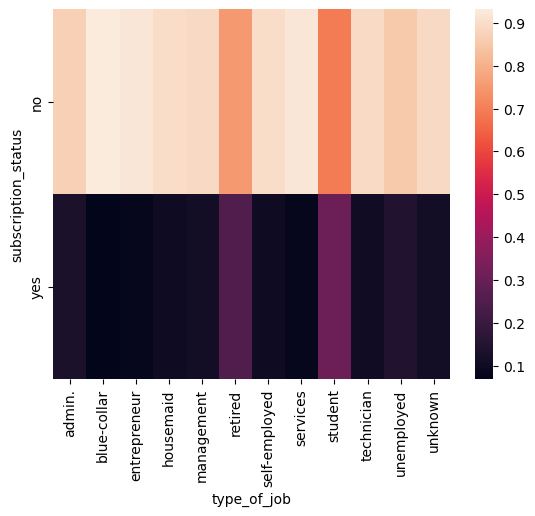

In [126]:
st_perc = pd.crosstab(bank_additional["subscription_status"], bank_additional["type_of_job"], normalize='columns')

sns.heatmap(st_perc)

<Axes: xlabel='type_of_job', ylabel='subscription_status'>

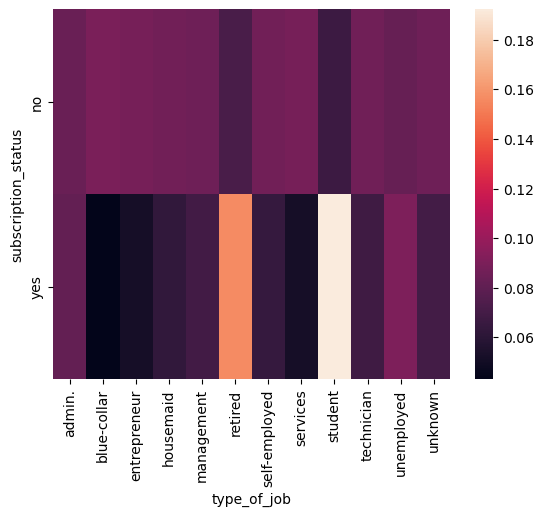

In [130]:
sns.heatmap(st_perc)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'housemaid'),
  Text(4, 0, 'retired'),
  Text(5, 0, 'self-employed'),
  Text(6, 0, 'services'),
  Text(7, 0, 'student'),
  Text(8, 0, 'technician'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'unknown')])

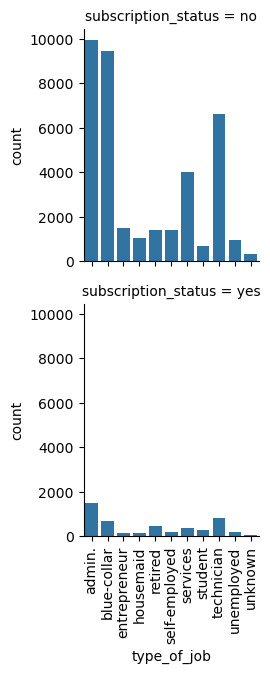

In [178]:
g = sns.FacetGrid(bank_additional, row='subscription_status')
g.map(sns.countplot, 'type_of_job', order=['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'])

plt.xticks(rotation=90)

In [179]:
st_perc = st_perc.T.sort_values(by='type_of_job', ascending=False)

Contacts vs Months & Term Deposits vs Months

In [181]:
cmt = pd.crosstab(bank_additional["last_contact_month"], bank_additional["contact_type"], normalize='columns')
cmt

contact_type,cellular,telephone
last_contact_month,,
apr,0.091540,0.012779
aug,0.226559,0.017564
dec,0.005834,0.002180
jul,0.233018,0.071165
jun,0.031463,0.299316
mar,0.018405,0.003876
may,0.211661,0.548241
nov,0.141686,0.028284
oct,0.021392,0.010357


In [182]:
month_order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

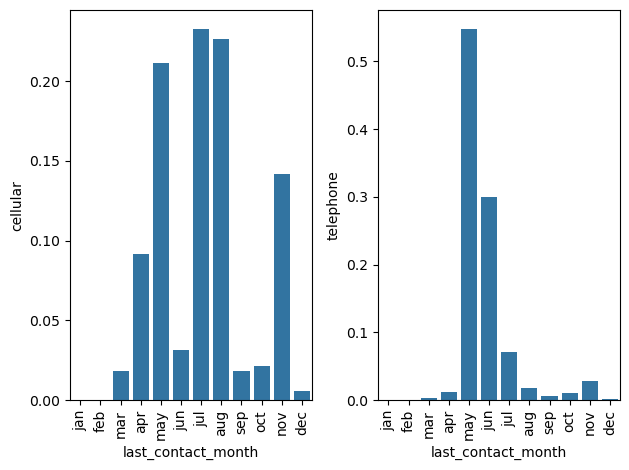

In [183]:
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.barplot(x="last_contact_month", y="cellular", data=cmt, order = month_order, ax = axes[0])
sns.barplot(x="last_contact_month", y="telephone", data=cmt, order = month_order, ax = axes[1])

axes[0].set_xticks(month_order)
axes[1].set_xticks(month_order)
axes[0].set_xticklabels(month_order, rotation=90)
axes[1].set_xticklabels(month_order, rotation=90)
fig.tight_layout()

Subscription status vs Contact Information

<Axes: xlabel='subscription_status', ylabel='last_contact_duration_in_sec'>

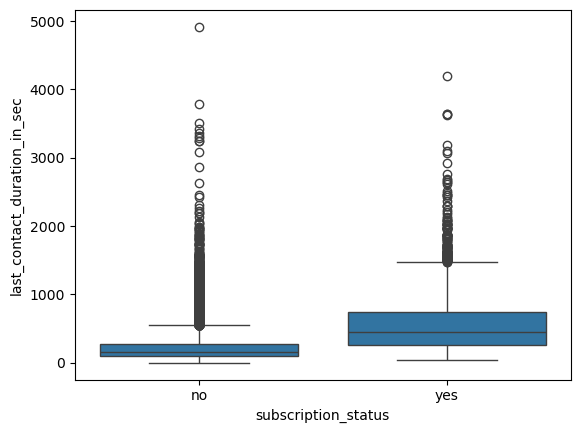

In [186]:
sns.boxplot(x='subscription_status', y='last_contact_duration_in_sec', data=bank_additional)

<Axes: xlabel='subscription_status', ylabel='last_contact_day'>

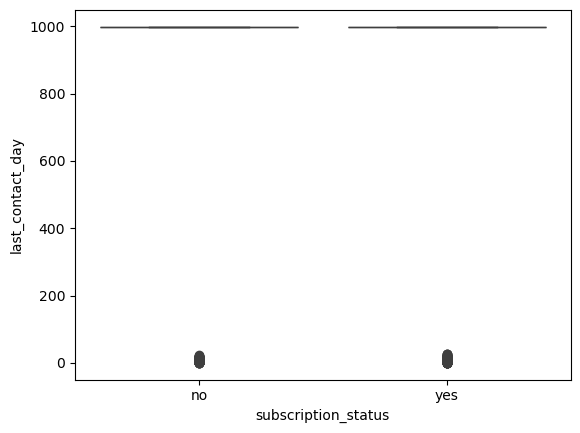

In [187]:
sns.boxplot(x='subscription_status', y='last_contact_day', data=bank_additional)

<Axes: xlabel='subscription_status', ylabel='last_contact_day'>

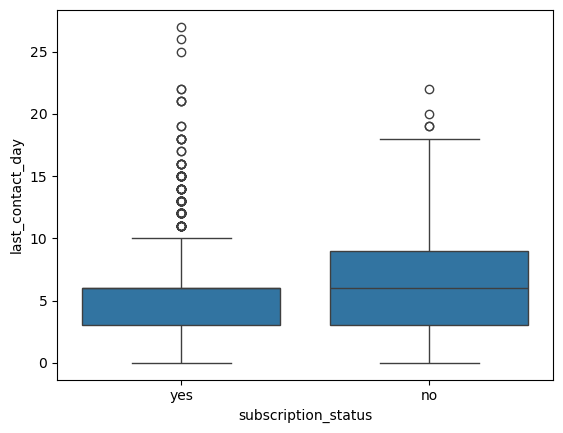

In [189]:
valid_contact_days = bank_additional[bank_additional["last_contact_day"] < 999]
sns.boxplot(x='subscription_status', y='last_contact_day', data=valid_contact_days)

<Axes: xlabel='subscription_status', ylabel='number_of_contacts_during'>

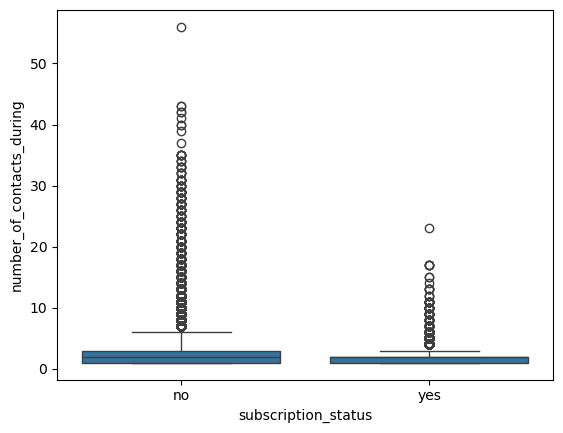

In [191]:
sns.boxplot(x='subscription_status', y='number_of_contacts_during', data=bank_additional)

<Axes: xlabel='subscription_status', ylabel='number_of_contacts_previous'>

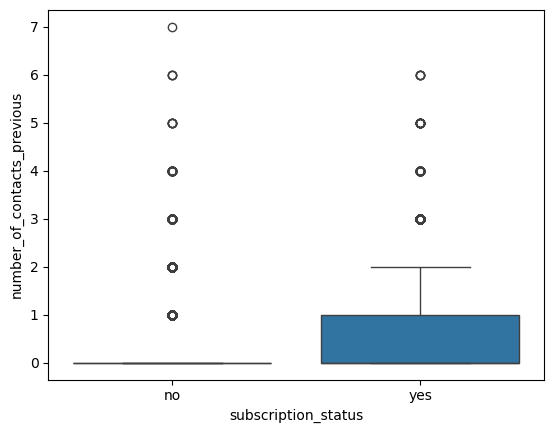

In [197]:
sns.boxplot(x='subscription_status', y='number_of_contacts_previous', data=bank_additional)

Personal Financials vs Dependent Var

In [198]:
bank_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45307 entries, 0 to 45306
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                45307 non-null  int64  
 1   type_of_job                        45307 non-null  object 
 2   marital_status                     45307 non-null  object 
 3   education_level                    43409 non-null  float64
 4   credit_in_default                  45307 non-null  object 
 5   housing_loan                       45307 non-null  object 
 6   personal_loan                      45307 non-null  object 
 7   contact_type                       45307 non-null  object 
 8   last_contact_day_of_week           45307 non-null  object 
 9   last_contact_month                 45307 non-null  object 
 10  last_contact_duration_in_sec       45307 non-null  int64  
 11  number_of_contacts_during          45307 non-null  int

<Axes: xlabel='subscription_status', ylabel='housing_loan'>

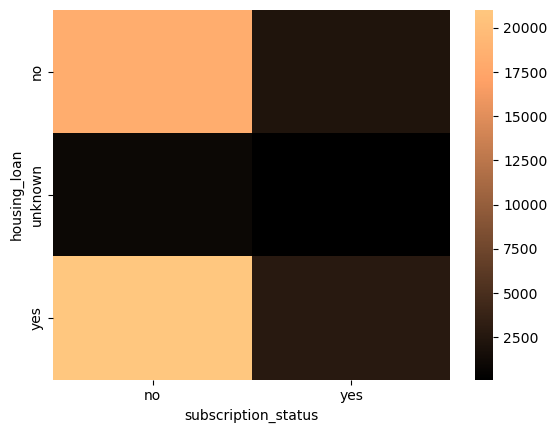

In [246]:
housing = pd.crosstab(bank_additional["housing_loan"], bank_additional["subscription_status"])
sns.heatmap(housing, cmap="copper")

<Axes: xlabel='subscription_status', ylabel='personal_loan'>

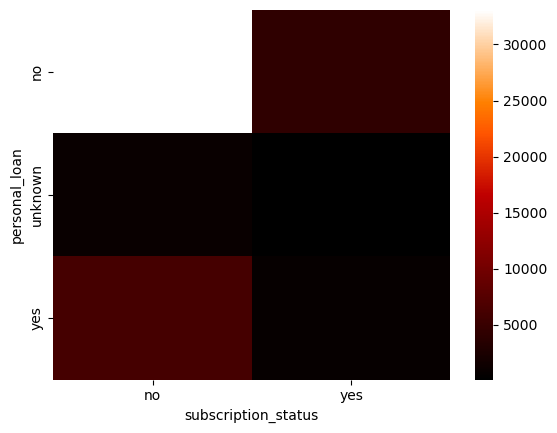

In [247]:
personal = pd.crosstab(bank_additional["personal_loan"], bank_additional["subscription_status"])
sns.heatmap(personal, cmap="gist_heat")

<Axes: xlabel='subscription_status', ylabel='credit_in_default'>

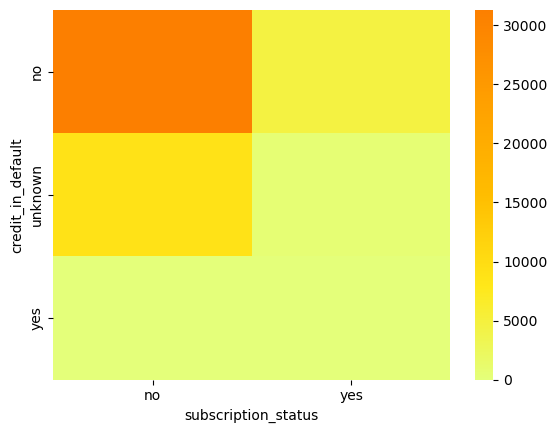

In [248]:
credit = pd.crosstab(bank_additional["credit_in_default"], bank_additional["subscription_status"])
sns.heatmap(credit, cmap="Wistia")

<Axes: xlabel='subscription_status', ylabel='age'>

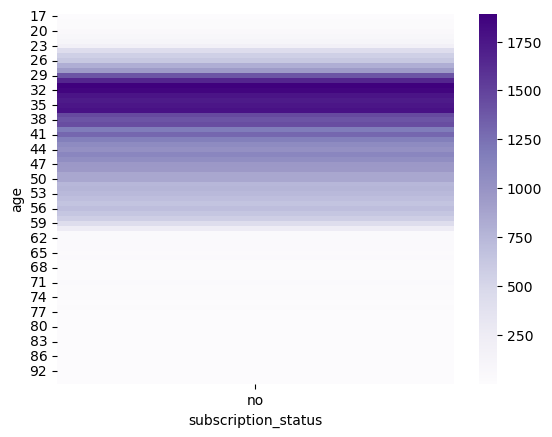

In [234]:
temp = bank_additional.copy()
temp = temp.sort_values(by="age")

age1 = pd.crosstab(temp[temp["subscription_status"] == "no"]["age"], temp["subscription_status"])
sns.heatmap(age1, cmap="Purples")

<Axes: xlabel='subscription_status', ylabel='age'>

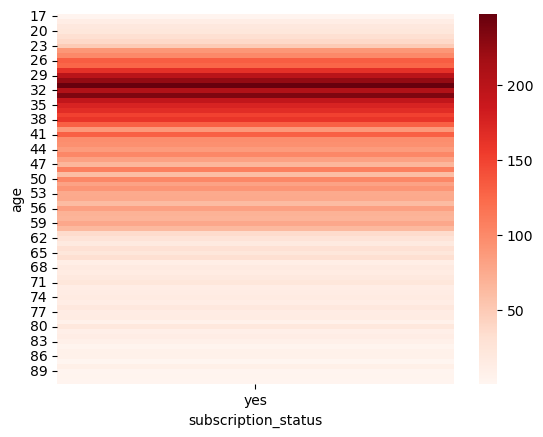

In [235]:
age2 = pd.crosstab(temp[temp["subscription_status"] == "yes"]["age"], temp["subscription_status"])
sns.heatmap(age2, cmap="Reds")

**Tests to validation association/relationships**

In [317]:
from scipy.stats import chi2_contingency
from scipy import stats

In [239]:
bank_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45307 entries, 0 to 45306
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                45307 non-null  int64  
 1   type_of_job                        45307 non-null  object 
 2   marital_status                     45307 non-null  object 
 3   education_level                    43409 non-null  float64
 4   credit_in_default                  45307 non-null  object 
 5   housing_loan                       45307 non-null  object 
 6   personal_loan                      45307 non-null  object 
 7   contact_type                       45307 non-null  object 
 8   last_contact_day_of_week           45307 non-null  object 
 9   last_contact_month                 45307 non-null  object 
 10  last_contact_duration_in_sec       45307 non-null  int64  
 11  number_of_contacts_during          45307 non-null  int

In [302]:
import statsmodels.api as sm

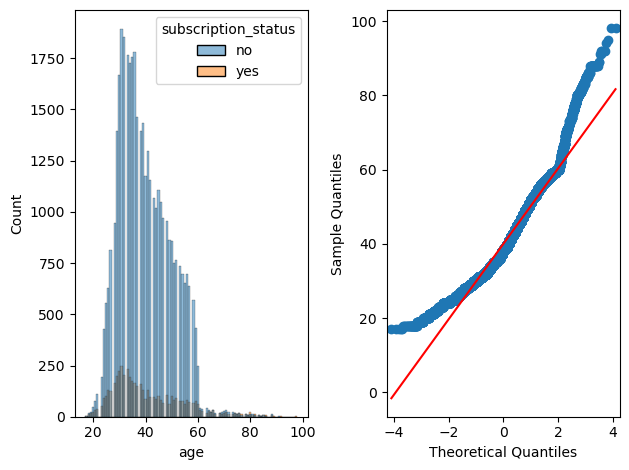

In [304]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.histplot(bank_additional, x = 'age', hue = 'subscription_status', ax = ax[0])
sm.qqplot(bank_additional['age'], line = 'r', ax = ax[1])

fig.tight_layout()

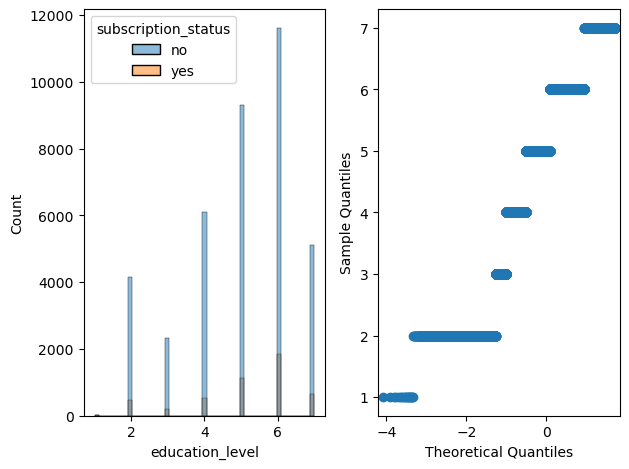

In [306]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.histplot(bank_additional, x = 'education_level', hue = 'subscription_status', ax = ax[0])
sm.qqplot(bank_additional['education_level'], line = 'r', ax = ax[1])

fig.tight_layout()

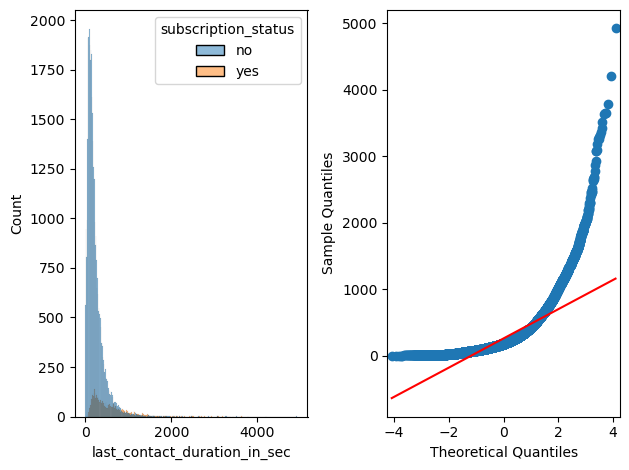

In [307]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.histplot(bank_additional, x = 'last_contact_duration_in_sec', hue = 'subscription_status', ax = ax[0])
sm.qqplot(bank_additional['last_contact_duration_in_sec'], line = 'r', ax = ax[1])

fig.tight_layout()

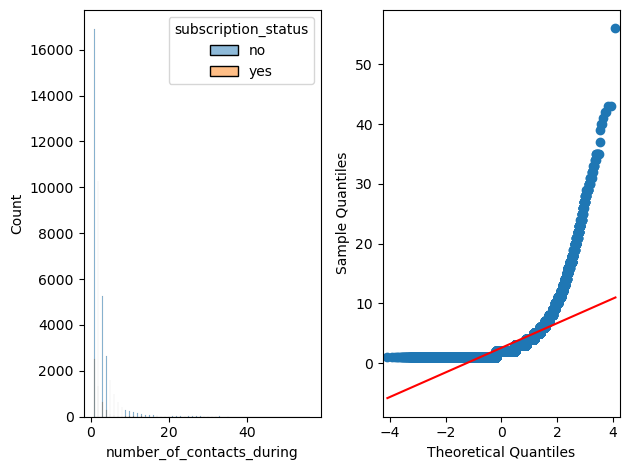

In [308]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.histplot(bank_additional, x = 'number_of_contacts_during', hue = 'subscription_status', ax = ax[0])
sm.qqplot(bank_additional['number_of_contacts_during'], line = 'r', ax = ax[1])

fig.tight_layout()

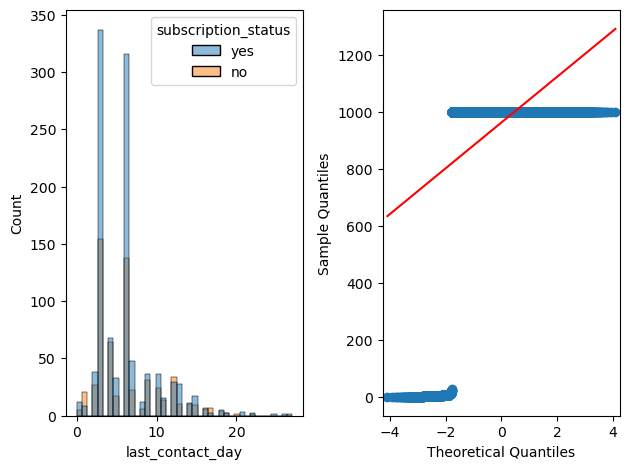

In [309]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.histplot(bank_additional[bank_additional['last_contact_day'] < 999], x = 'last_contact_day', hue = 'subscription_status', ax = ax[0])
sm.qqplot(bank_additional['last_contact_day'], line = 'r', ax = ax[1])

fig.tight_layout()

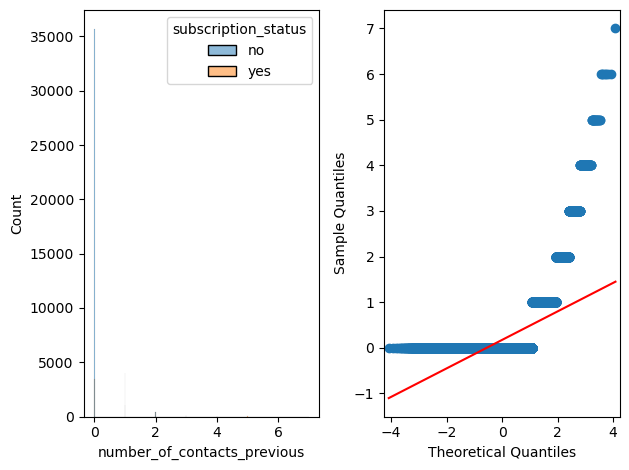

In [310]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.histplot(bank_additional, x = 'number_of_contacts_previous', hue = 'subscription_status', ax = ax[0])
sm.qqplot(bank_additional['number_of_contacts_previous'], line = 'r', ax = ax[1])

fig.tight_layout()

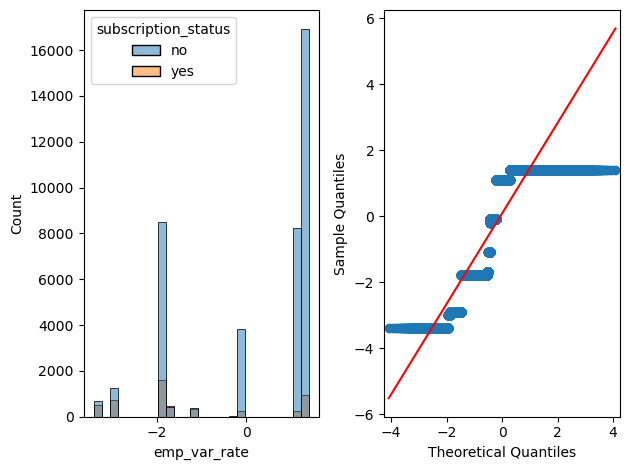

In [311]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.histplot(bank_additional, x = 'emp_var_rate', hue = 'subscription_status', ax = ax[0])
sm.qqplot(bank_additional['emp_var_rate'], line = 'r', ax = ax[1])

fig.tight_layout()

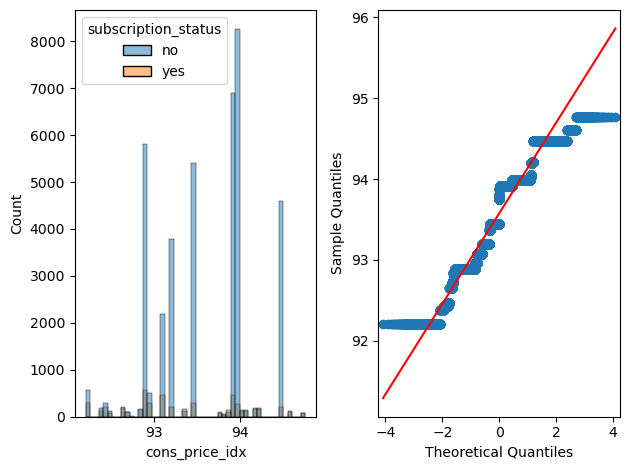

In [312]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.histplot(bank_additional, x = 'cons_price_idx', hue = 'subscription_status', ax = ax[0])
sm.qqplot(bank_additional['cons_price_idx'], line = 'r', ax = ax[1])

fig.tight_layout()

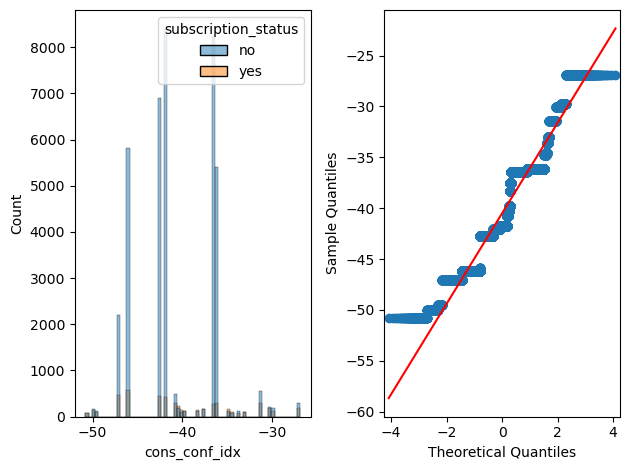

In [313]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.histplot(bank_additional, x = 'cons_conf_idx', hue = 'subscription_status', ax = ax[0])
sm.qqplot(bank_additional['cons_conf_idx'], line = 'r', ax = ax[1])

fig.tight_layout()

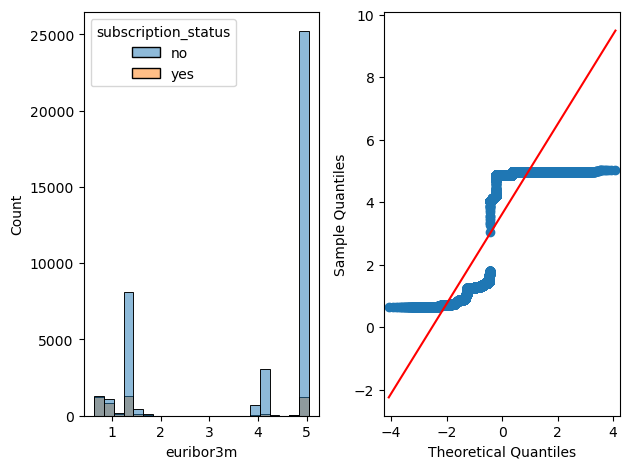

In [314]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.histplot(bank_additional, x = 'euribor3m', hue = 'subscription_status', ax = ax[0])
sm.qqplot(bank_additional['euribor3m'], line = 'r', ax = ax[1])

fig.tight_layout()

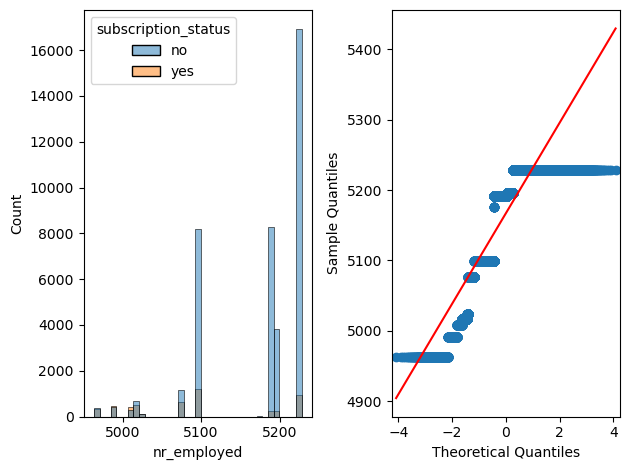

In [315]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.histplot(bank_additional, x = 'nr_employed', hue = 'subscription_status', ax = ax[0])
sm.qqplot(bank_additional['nr_employed'], line = 'r', ax = ax[1])

fig.tight_layout()

Personal Indicators

In [316]:
bank_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45307 entries, 0 to 45306
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                45307 non-null  int64  
 1   type_of_job                        45307 non-null  object 
 2   marital_status                     45307 non-null  object 
 3   education_level                    43409 non-null  float64
 4   credit_in_default                  45307 non-null  object 
 5   housing_loan                       45307 non-null  object 
 6   personal_loan                      45307 non-null  object 
 7   contact_type                       45307 non-null  object 
 8   last_contact_day_of_week           45307 non-null  object 
 9   last_contact_month                 45307 non-null  object 
 10  last_contact_duration_in_sec       45307 non-null  int64  
 11  number_of_contacts_during          45307 non-null  int

In [260]:
housing_p = chi2_contingency(housing).pvalue
credit_p = chi2_contingency(credit).pvalue
personal_p = chi2_contingency(personal).pvalue
toj_p = chi2_contingency(pd.crosstab(bank_additional['type_of_job'], bank_additional['subscription_status'])).pvalue
marital_p = chi2_contingency(pd.crosstab(bank_additional['marital_status'], bank_additional['subscription_status'])).pvalue

In [261]:
print(f"P-Values for Associations:\nHousing Loan vs Dep Var = {housing_p}\nCredit Default vs Dep Var = {credit_p}\nPersonal Loan vs Dep Var = {personal_p}\nType of Job vs Dep Var = {toj_p}\nMarital Status vs Dep Var = {marital_p}")

P-Values for Associations:
Housing Loan vs Dep Var = 0.06349678095230799
Credit Default vs Dep Var = 6.528806401578499e-94
Personal Loan vs Dep Var = 0.425601869758614
Type of Job vs Dep Var = 4.420781682858145e-212
Marital Status vs Dep Var = 1.5856115223706583e-28


In [325]:
_, age_p = stats.kruskal(bank_additional[bank_additional['subscription_status'] == 'no']['age'].dropna(), bank_additional[bank_additional['subscription_status'] == 'yes']['age'].dropna())
_, education_p = stats.kruskal(bank_additional[bank_additional['subscription_status'] == 'no']['education_level'].dropna(), bank_additional[bank_additional['subscription_status'] == 'yes']['education_level'].dropna())

In [326]:
print(f"P-Values for Relationships:\nAge vs Dep Var = {age_p}\nEducation Level vs Dep Var = {education_p}")

P-Values for Relationships:
Age vs Dep Var = 0.0632564235124434
Education Level vs Dep Var = 4.7226230917908614e-24


Contact Indicators

In [263]:
ct_p = chi2_contingency(pd.crosstab(bank_additional['contact_type'], bank_additional['subscription_status'])).pvalue
ctw_p = chi2_contingency(pd.crosstab(bank_additional['last_contact_day_of_week'], bank_additional['subscription_status'])).pvalue
ctm_p = chi2_contingency(pd.crosstab(bank_additional['last_contact_month'], bank_additional['subscription_status'])).pvalue

In [277]:
print(f"P-Values for Associations:\nContact Type vs Dep Var = {ct_p}\nLast Contact Day of Week vs Dep Var = {ctw_p}\nLast Contact Month vs Dep Var = {ctm_p}")

P-Values for Associations:
Contact Type vs Dep Var = 2.2114141249801805e-206
Last Contact Day of Week vs Dep Var = 0.00013998503294215537
Last Contact Month vs Dep Var = 0.0


In [330]:
_, lcds_p = stats.kruskal(bank_additional[bank_additional['subscription_status'] == 'no']['last_contact_duration_in_sec'].dropna(), bank_additional[bank_additional['subscription_status'] == 'yes']['last_contact_duration_in_sec'].dropna())
_, ncd_p = stats.kruskal(bank_additional[bank_additional['subscription_status'] == 'no']['number_of_contacts_during'].dropna(), bank_additional[bank_additional['subscription_status'] == 'yes']['number_of_contacts_during'].dropna())
_, lcd_p = stats.kruskal(bank_additional[(bank_additional['subscription_status'] == 'no') & (bank_additional['last_contact_day'] < 999)]['last_contact_day'].dropna(), bank_additional[(bank_additional['subscription_status'] == 'yes') & (bank_additional['last_contact_day'] < 999)]['last_contact_day'].dropna())
_, ncp_p = stats.kruskal(bank_additional[bank_additional['subscription_status'] == 'no']['number_of_contacts_previous'].dropna(), bank_additional[bank_additional['subscription_status'] == 'yes']['number_of_contacts_previous'].dropna())

In [331]:
print(f"P-Values for Relationships:\nLast Contact Duration in Sec vs Dep Var = {lcds_p}\nNumber of Contacts During vs Dep Var = {ncd_p}\nLast Contact Day vs Dep Var = {lcd_p}\nNumber of Contacts Previous vs Dep Var = {ncp_p}")

P-Values for Relationships:
Last Contact Duration in Sec vs Dep Var = 0.0
Number of Contacts During vs Dep Var = 1.581814375008362e-41
Last Contact Day vs Dep Var = 0.2674749972617465
Number of Contacts Previous vs Dep Var = 0.0


<Axes: xlabel='last_contact_month', ylabel='Count'>

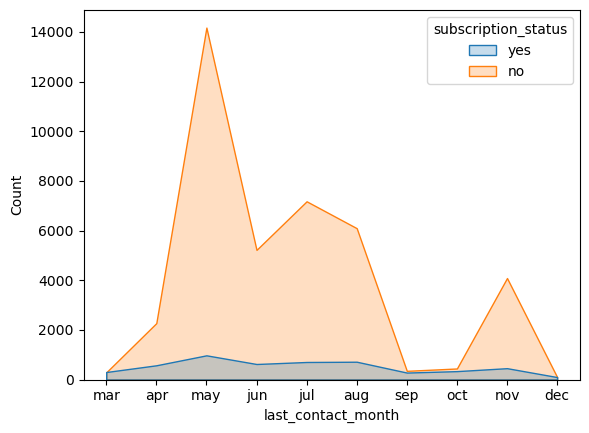

In [276]:
month_map = {"jan": 0, "feb": 1, "mar": 2, "apr": 3, "may": 4, "jun": 5, "jul": 6, "aug": 7, "sep": 8, "oct": 9, "nov": 10, "dec": 11}
sns.histplot(bank_additional.sort_values(by = "last_contact_month", key = lambda c : c.map(month_map)), x = 'last_contact_month', hue = 'subscription_status', element = 'poly')

**Economic Indicators**

In [332]:
_, evr_p = stats.kruskal(bank_additional[bank_additional['subscription_status'] == 'no']['emp_var_rate'].dropna(), bank_additional[bank_additional['subscription_status'] == 'yes']['emp_var_rate'].dropna())
_, cpi_p = stats.kruskal(bank_additional[bank_additional['subscription_status'] == 'no']['cons_price_idx'].dropna(), bank_additional[bank_additional['subscription_status'] == 'yes']['cons_price_idx'].dropna())
_, cci_p = stats.kruskal(bank_additional[bank_additional['subscription_status'] == 'no']['cons_conf_idx'].dropna(), bank_additional[bank_additional['subscription_status'] == 'yes']['cons_conf_idx'].dropna())
_, eur_p = stats.kruskal(bank_additional[bank_additional['subscription_status'] == 'no']['euribor3m'].dropna(), bank_additional[bank_additional['subscription_status'] == 'yes']['euribor3m'].dropna())
_, nre_p = stats.kruskal(bank_additional[bank_additional['subscription_status'] == 'no']['nr_employed'].dropna(), bank_additional[bank_additional['subscription_status'] == 'yes']['nr_employed'].dropna())

In [333]:
print(f"P-Values for Relationships:\nEmp Var Rate vs Dep Var = {evr_p}\nCons Price Idx vs Dep Var = {cpi_p}\nCons Conf Idx vs Dep Var = {cci_p}\nEuribor 3 Months vs Dep Var = {eur_p}\nNumber Employed vs Dep Var = {nre_p}")

P-Values for Relationships:
Emp Var Rate vs Dep Var = 0.0
Cons Price Idx vs Dep Var = 2.988751492467e-141
Cons Conf Idx vs Dep Var = 6.765238886107195e-19
Euribor 3 Months vs Dep Var = 0.0
Number Employed vs Dep Var = 0.0


**Significant Associations:** type of job, marital status, credit in default, contact type, last contact day of week, last contact month, and outcome of the previous marketing

**Significant Relationships:** education level, last contact duration in sec, number of contacts during, number of contacts previous, emp var rate, cons price idx, cons conf idx, euribor3m, number employed